<font color='red'>Review</font>
- To jest bardzo proste środowisko a wiedza nie została wyuczona w 100% (trzeba to ogarnąć)
- Przeorganizowałem nieco kod na bardziej czytelniejszy. Zwróć uwagę na [tą](#List-classifiers) komórkę. Na mój gust na górze posortowanej listy powinny być klasyfikatory bliżej nagrody, stopniowo oddalając się w kierunku prawej strony. Tu tak nie jest

In [1]:
# activate pyalcs-experiments

# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [2]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_corridor

import pandas as pd
import numpy as np

# maze = gym.make('corridor-100-v0')
maze = gym.make('corridor-40-v0')
# maze = gym.make('corridor-20-v0')

maze.reset()
maze.render()

[........X..............................$]


In [3]:
from lcs.agents.xcs import XCS, Configuration

# TODO: Move to utils
def xcs_corridor_knowledge(xcs: XCS, environment):
    nr_correct = 0
    position = 0
    while environment.observation_space.contains(position):
        if any([True for cl in xcs.population if cl.does_match(str(position)) and
                                                 cl.action == 1 and 
                                                 cl.wildcard_number == 0 ]):
            nr_correct += 1
        if any([True for cl in xcs.population if cl.does_match(str(position)) and
                                                 cl.action == 0 and 
                                                 cl.wildcard_number == 0 ]):
            nr_correct += 1
        position += 1
    return nr_correct / (position*2)


def xcs_corridor_metrics(xcs: XCS, environment):
    return {
        'population': len(xcs.population),
        'knowledge': xcs_corridor_knowledge(xcs, environment),
        'numerosity': sum(cl.numerosity for cl in xcs.population)
    }

In [4]:
cfg = Configuration(number_of_actions=2,
                    metrics_trial_frequency=1,
                    covering_wildcard_chance=1,
                    user_metrics_collector_fcn=xcs_corridor_metrics)

agent = XCS(cfg)
explore_population, explore_metrics = agent.explore(maze, 1000, False)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 200, 'reward': [2.944120652627682e-39, 3.071105928614176e-39], 'perf_time': 0.02247253399400506, 'population': 32, 'knowledge': 0.3875, 'numerosity': 122}
INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 5, 'reward': [72.71468807523601, 142.2856017704231], 'perf_time': 0.0007007239910308272, 'population': 68, 'knowledge': 0.75, 'numerosity': 200}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 18, 'reward': [34.007724741931874, 129.66262698325392], 'perf_time': 0.0024042559962254018, 'population': 66, 'knowledge': 0.725, 'numerosity': 200}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 200, 'reward': [51.084456851951785, 48.28798328396105], 'perf_time': 0.02581497900246177, 'population': 66, 'knowledge': 0.725, 'numerosity': 200}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 16, 'reward': [30.196522508124385, 145.578110206844], 'perf_time': 0.0020324390061432496, 'population': 62, 'knowledge': 0.6875, 'n

### List classifiers

In [5]:
for cl in sorted(explore_population, key=lambda cl: -cl.prediction)[:10]:
    print(str(cl))

Cond:0 - Act:1 - Num:1 [fit: 0.000, exp: 4640.00, pred: 269.701]
Cond:1 - Act:1 - Num:2 [fit: 0.000, exp: 2123.00, pred: 259.866]
Cond:1 - Act:0 - Num:1 [fit: 0.000, exp: 4709.00, pred: 208.224]
Cond:2 - Act:1 - Num:4 [fit: 0.000, exp: 1694.00, pred: 197.502]
Cond:19 - Act:1 - Num:4 [fit: 0.000, exp: 564.00, pred: 186.917]
Cond:23 - Act:1 - Num:3 [fit: 0.016, exp: 1264.00, pred: 177.966]
Cond:18 - Act:1 - Num:5 [fit: 0.000, exp: 569.00, pred: 176.239]
Cond:26 - Act:1 - Num:1 [fit: 0.000, exp: 1374.00, pred: 172.835]
Cond:25 - Act:1 - Num:3 [fit: 0.004, exp: 1031.00, pred: 165.747]
Cond:31 - Act:1 - Num:1 [fit: 0.000, exp: 792.00, pred: 164.018]


Following is prediction Array. In case of Corridor better the last value the better

In [6]:
explore_population.prediction_array

[115.57900208732934, 118.70329138343904]

In [7]:
# TODO Merge explore and exploit

(0.0, 1.0)

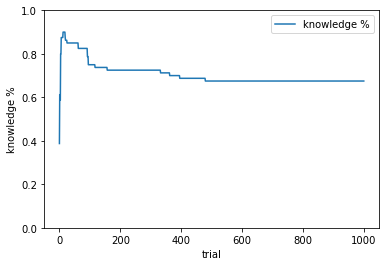

In [8]:
df = pd.DataFrame(metric["knowledge"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("knowledge %")
ax.legend(["knowledge %"])
ax.set_ylim(ymin=0, ymax=1)

(0.0, 250.0)

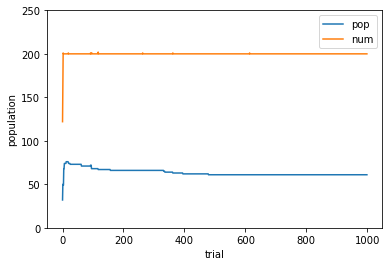

In [9]:
df = pd.DataFrame(zip([metric["population"] for metric in explore_metrics], [metric["numerosity"] for metric in explore_metrics]))
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["pop", "num"])
ax.set_ylim(ymin=0, ymax=250)

(0.0, 250.0)

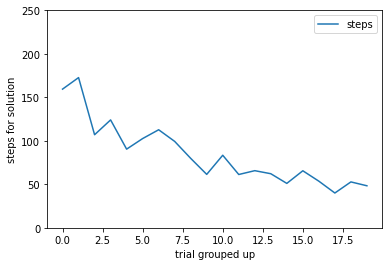

In [10]:
xf = [metric["steps_in_trial"] for metric in explore_metrics]
temp_df = np.array_split(xf, 20)
for i in range(len(temp_df)):
    temp_df[i] = np.mean(temp_df[i]) 
df = pd.DataFrame(temp_df)
ax = df.plot()
ax.set_xlabel("trial grouped up")
ax.set_ylabel("steps for solution")
ax.legend(["steps"])
ax.set_ylim(ymin=0, ymax=250)